### generate data

In [2]:
import numpy as np
np.random.seed(400)
# generate factors
U = np.random.random((125, 10))
V = np.random.random((125, 10))
W = np.random.random((125, 10))
U = np.sort(U, axis=0) # make it smooth
W = np.sort(W, axis=0) # make it smooth

# tensor X
T = np.einsum('ir,jr,kr->ijk',U,V,W,optimize=True)

# mapping on the first mode
P1 = np.random.random((12, 125))
P1 = np.argsort(P1, axis=0) <= 0.0

# mapping on the first mode
P2 = np.random.random((12, 125))
P2 = np.argsort(P2, axis=0) <= 0.0

# C1, C2
C1 = np.einsum('ijk,ri->rjk',T,P1,optimize=True)
C2 = np.einsum('ijk,rj->irk',T,P2,optimize=True)

In [4]:
import numpy as np
import pickle

pickle.dump(T, open('X.pkl', 'wb'))
pickle.dump(C1, open('C1.pkl', 'wb'))
pickle.dump(C2, open('C2.pkl', 'wb'))
pickle.dump(P1, open('P1.pkl', 'wb'))
pickle.dump(P2, open('P2.pkl', 'wb'))

### Vis

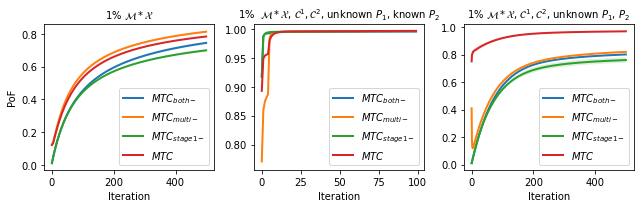

In [4]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
plt.figure(figsize=(9,3))


color = [
'#80b1d3',
'#999999',
'#4daf4a',
'#e41a1c']

plt.subplot(131)
lw = 2
label = ['$MTC_{both-}$','$MTC_{multi-}$','$MTC_{stage1-}$','$MTC$']

for index, i in enumerate([(0,0), (1,0), (0,1), (1,1)]):
    loss_list, rec_list = [], []
    for j in range(3):
        _, _, _, loss, rec = pickle.load(open('./synthetic_result/X_{}_jacobi_{}_multi_{}.pkl'.format(i[0], i[1], j), 'rb'))
        loss_list.append(np.array(loss[:])); rec_list.append(np.array(rec[:]))
    rec_list = np.vstack(rec_list)
    rec_mean = rec_list.mean(axis=0); rec_std = rec_list.std(axis=0)
    plt.plot(rec_mean, label=label[index], lw=lw)
    plt.fill_between(np.arange(len(rec_mean)), rec_mean - rec_std, rec_mean + rec_std, alpha = 0.15)

plt.legend()

plt.ylabel('PoF')
plt.xlabel('Iteration')
plt.title('1% $\mathcal{M}*\mathcal{X}$', fontsize=10)


plt.subplot(132)
label = ['$MTC_{both-}$','$MTC_{multi-}$','$MTC_{stage1-}$','$MTC$']

for index, i in enumerate([(0,0), (1,0), (0,1), (1,1)]):
    loss_list, rec_list = [], []
    for j in range(3):
        _, _, _, _, _, loss, rec = pickle.load(open('./synthetic_result/X_C1_C2_known_{}_jacobi_{}_multi_{}.pkl'.format(i[0], i[1], j), 'rb'))
        loss_list.append(np.array(loss[:])); rec_list.append(np.array(rec[:]))
    rec_list = np.vstack(rec_list)
    rec_mean = rec_list.mean(axis=0); rec_std = rec_list.std(axis=0)
    plt.plot(rec_mean, label=label[index], lw=lw)
    plt.fill_between(np.arange(len(rec_mean)), rec_mean - rec_std, rec_mean + rec_std, alpha = 0.15)

plt.legend()

plt.xlabel('Iteration')
plt.title('1%  $\mathcal{M}*\mathcal{X}$, $\mathcal{C}^1,\mathcal{C}^2$, unknown ${P}_1$, known ${P}_2$', fontsize=10)



plt.subplot(133)
label = ['$MTC_{both-}$','$MTC_{multi-}$','$MTC_{stage1-}$','$MTC$']

for index, i in enumerate([(0,0), (1,0), (0,1), (1,1)]):
    loss_list, rec_list = [], []
    for j in range(3):
        _, _, _, _, _, loss, rec = pickle.load(open('./synthetic_result/X_C1_C2_unknown_{}_jacobi_{}_multi_{}.pkl'.format(i[0], i[1], j), 'rb'))
        loss_list.append(np.array(loss[:])); rec_list.append(np.array(rec[:]))
    rec_list = np.vstack(rec_list)
    rec_mean = rec_list.mean(axis=0); rec_std = rec_list.std(axis=0)
    a = plt.plot(rec_mean, label=label[index], lw=lw)
    plt.fill_between(np.arange(len(rec_mean)), rec_mean - rec_std, rec_mean + rec_std, alpha = 0.15)

plt.legend()

plt.xlabel('Iteration')
plt.title('1% $\mathcal{M}*\mathcal{X}$, $\mathcal{C}^1,\mathcal{C}^2$, unknown ${P}_1$, ${P}_2$', fontsize=10)

plt.tight_layout()

# plt.savefig('synthetic.pdf')